<a href="https://colab.research.google.com/github/Krithika-Devi/DS-BI-Tasks/blob/main/Task_2_DS_%26_BI_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION**
 
---
 
 
 
## ***DATA SCIENCE & BUSINESS ANALYTICS*** 
 
---
 
### **TASK 2 - Prediction using Unsupervised ML**
 
### **AUTHOR:** KRITHIKA DEVI CHANDRAN

 
# **Agenda**
 
 
*   Problem Statement
    *   Dataset & Objective
    *   Data Description
*   Load Data
*   Data Visualization
*   Data Pre-Processing
*   Evaluation Methods to identify optimum number of clusters
    *   Elbow Method
    *   Silhouette Method
*   Training the K-means algorithm on the input dataset
*   Visualizing the clusters

## **Problem Statement**


### **Dataset & Objective**

**Iris Dataset: https://bit.ly/3kXTdox**

From the given 'Iris' dataset, our objective is to predict the optimum number of clusters and represent it visuallly. For this, K-Means clustering is used to segement the species efficiently. 

> **K-Means Clustering** algorithm is one of the simplest unsupervised machine learning algorithms, which groups the unlabeled dataset into different clusters.


> *It is an itertive algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.*


### **Data Description**

Iris Dataset Characteristics is **Multivariate.** It contains four features (length and width of sepals and petals) of **150 samples** of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 

**Attribute Information:**
1. SepalLengthCm
2. SepalWidthCm
3. PetalLengthCm
4. PetalWidthCm
5. Species (Class):
   *   Iris-setosa
   *   Iris-versicolor
   *   Iris-virginica 




## **Load Data**

In [ ]:
# Importing required libraries 
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to plot the diagrams within the cells
%matplotlib inline

In [ ]:
# Uploading dataset to colab
from google.colab import files
uploaded = files.upload()

print("Data imported successfully")

Saving Iris.csv to Iris (1).csv
Data imported successfully


In [ ]:
# Reading uploaded csv data
iris = pd.read_csv("Iris.csv")
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
3,4,4.6,3.1,1.5,0.2,Iris-setosa
31,32,5.4,3.4,1.5,0.4,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
iris = iris.drop(columns=['Id'])
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## **Data Visualization**


In [ ]:
import warnings
warnings.filterwarnings("ignore")

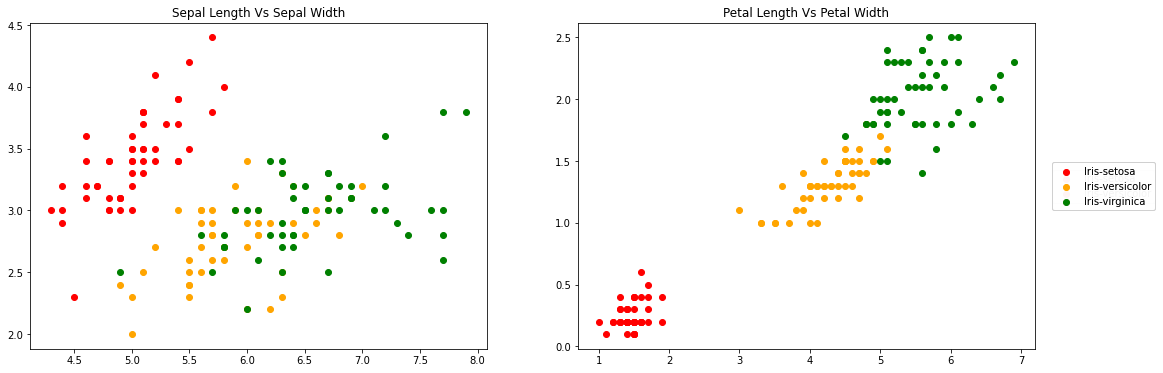

In [ ]:
# Visualizing SepalLengthCm Vs SepalWidthCm & PetalLengthCm Vs PetalWidthCm
colors = ['red','orange','green']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

for i in range(3):
  sp = iris[iris['Species']==species[i]]
  ax[0].scatter(x=sp['SepalLengthCm'], y=sp['SepalWidthCm'], c=colors[i])
  ax[0].set_title("Sepal Length Vs Sepal Width")
  ax[1].scatter(x=sp['PetalLengthCm'], y=sp['PetalWidthCm'], c=colors[i])
  ax[1].set_title("Petal Length Vs Petal Width")
  # Create the legend
  fig.legend(colors,     # The color objects
           labels=species,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.8,    # Small spacing around legend box
           )
  

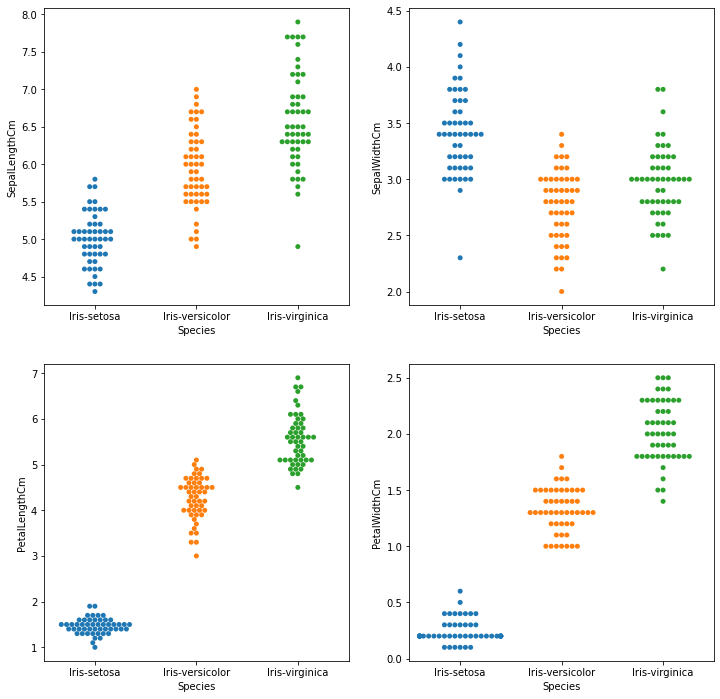

In [ ]:
# Visualizing Species Vs SepalLength,WidthCm & Species Vs PetaLength,WidthCm
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

sns.swarmplot(x='Species', y='SepalLengthCm', data=iris, ax=axes[0,0])
sns.swarmplot(x='Species', y='SepalWidthCm', data=iris, ax=axes[0,1])
sns.swarmplot(x='Species', y='PetalLengthCm', data=iris, ax=axes[1,0])
sns.swarmplot(x='Species', y='PetalWidthCm', data=iris, ax=axes[1,1])

plt.show()

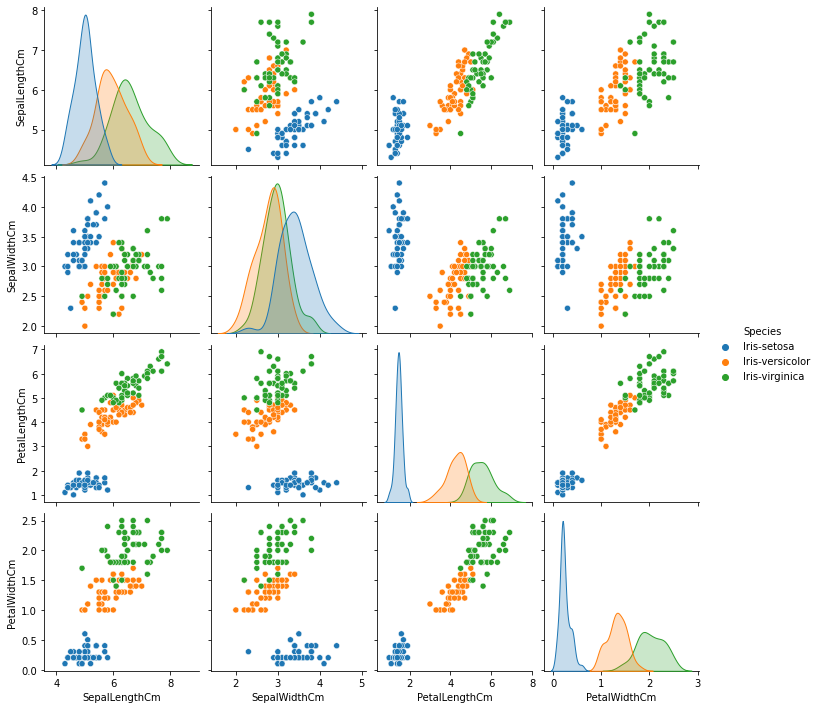

In [ ]:
# Plotting the pair plot to visualize all attributes/variables at once
sns.pairplot(iris, hue='Species')
plt.show()

In [ ]:
# Viewing Correlations between variables
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


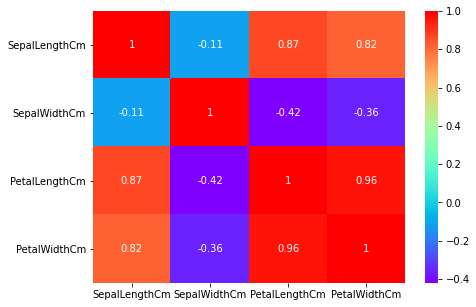

In [ ]:
# Visualizing above Correlation matrix using heatmap
plt.figure(figsize=(7,5))
sns.heatmap(iris.corr(), annot = True, cmap = 'rainbow')
plt.show()

## **Data Pre-Processing**

In [ ]:
# Splitting training data 
X = iris.iloc[:, [0, 1, 2, 3]].values
# (or) X = iris[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Splitting target data
y = iris.iloc[:, 4]

X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Here, Variables are measured at different scales. So, it do not contribute equally to the model fitting & model learned function and might end up creating a bias (i.e. the model might be either overestimate or underestimate). 

Thus, to deal this potential problem, we use **StandardScaler()** which transforms the data in feature-wise that removes the mean and scales each feature/variable to unit variance which follows properties of **Standard Normal Distribution**(mean, 0 and standard deviation,1). This can be influenced by outliers. 

In [ ]:
# importing StandardScaler from preprocessing sklearn library
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X)
x[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [ ]:
print("Mean: ", round(x[:, 0].std(),1))
print("Standard Deviation: ", round(x[:, 0].mean(),1))

Mean:  1.0
Standard Deviation:  -0.0


## **Evaluation methods to identify the optimum number of clusters**

### **1. Elbow Method**

The elbow method involves finding a metric to evaluate how good a clustering outcome is for various value of K and finding the ***elbow point***. 

The most popular metric used under Elbow method is the **Within Cluster Sum of Squares (WCSS)** which minimizes the variation in the paritition of cluster such as k-means clustering between data points and their assigned cluster's centroids. (i.e. WCSS minimizes total within cluster variation.)

**The following algorithm is to define the optimal clusters:**

1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
2. For each k, calculate the total within cluster sum of square (wcss)
3. Plot the curve of wcss according to the number of clusters k.
4. The location of a bend (elbow/knee) in the plot is generally considered as an indicator of the appropriate number of clusters.




In [ ]:
# importing cluster library
import sklearn.cluster as cluster

In [ ]:
# importing 'KMeans' from  'sklearn.cluster' library
from sklearn.cluster import KMeans

# Computing WCSS for k=1 to k=11
K = range(1,11) 
wcss = []

for k in K:
    kmeans = KMeans(n_clusters = k, init = 'k-means++',     
                    max_iter = 300, n_init = 10, random_state = 0) # 'k-means++' selects initial cluster centers for K-Means clustering in a smart way to speed up convergence.
    kmeans.fit(x) # Fit the data to kmeans
    wcss.append(kmeans.inertia_) # 'inertia_'(float value)- sum of squared distances of samples to their closest cluster center

kmeans.cluster_centers_  # Centroids-Coordinates of cluster centers for k values from range 1 to 11 


array([[ 0.33523111, -0.72660531,  0.79972135,  0.84975363],
       [-0.96126511,  0.92792589, -1.29577984, -1.20779835],
       [-0.02699705, -0.36853967,  0.30783301,  0.19550261],
       [-0.40254659, -1.51337539,  0.09616622,  0.00905703],
       [-1.38535265, -0.03496756, -1.3381132 , -1.33488889],
       [ 0.91683689,  0.26978863,  0.99691154,  1.35515119],
       [-0.54727488,  2.01551983, -1.27019027, -1.214372  ],
       [ 0.89087234,  0.00727266,  0.52717215,  0.38678096],
       [ 2.12851559,  1.57199748,  1.50201279,  1.360307  ],
       [ 1.92656914, -0.30493769,  1.42619186,  1.03892863]])

In [ ]:
# identifying labels of cluster for each point 

cluster_labels = kmeans.fit_predict(x)
# (or) labels = kmeans.labels_ 
cluster_labels

array([1, 4, 4, 4, 1, 6, 1, 1, 4, 4, 6, 1, 4, 4, 6, 6, 6, 1, 6, 6, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 6, 6, 4, 4, 1, 4, 4, 1, 1, 4, 4, 1,
       6, 4, 6, 4, 6, 1, 7, 7, 7, 3, 7, 2, 7, 3, 7, 3, 3, 2, 3, 2, 2, 7,
       2, 2, 3, 3, 2, 2, 0, 2, 7, 7, 7, 7, 2, 3, 3, 3, 2, 0, 2, 7, 7, 3,
       2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 5, 0, 9, 0, 5, 9, 3, 9, 0, 8,
       5, 0, 5, 0, 0, 5, 7, 8, 9, 3, 5, 0, 9, 0, 5, 9, 0, 0, 0, 9, 9, 8,
       0, 0, 0, 9, 5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 0], dtype=int32)

In [ ]:
# Extracting WCSS for each cluster 
mycentroids = pd.DataFrame({'Clusters':K, 'WCSS':wcss})
mycentroids

,Clusters,WCSS
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.429708
4,5,91.148601
5,6,80.230607
6,7,70.939644
7,8,62.967585
8,9,55.706411
9,10,47.473984


### **Visualization of WCSS to identify Elbow point**

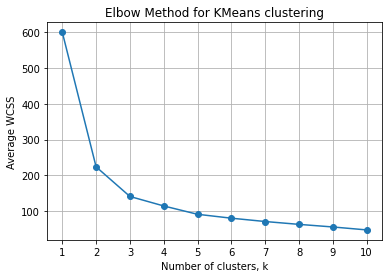

In [ ]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(K, wcss, marker='o', markersize=6)
plt.title('Elbow Method for KMeans clustering')
plt.xticks(range(1,11))
plt.grid(True)
plt.xlabel('Number of clusters, k')
plt.ylabel('Average WCSS') # Within cluster sum of squares
plt.show()

From the above elbow graph, we can see that **3 is the optimal number of clusters as it appears to be the bend in the elbow.** (i.e. by picking the value of k, where the ***average distance falls suddenly.***)

## **2. Silhouette Method**

*   The **Silhouette Method** is also a method to find the optimal number of clusters and interpretation and validation of consistency within clusters of data.

*   Silhouette Analysis determines how well each object lies within its clusters.

*   The silhouette method computes silhouette coefficients of each point that measure how much a point is similar to its own cluster compared to other clusters.

> *Compute silhouette coefficients for each of point, and average it out for all the samples to get the silhouette score. The silhouette value is a measure of how similar an object is to its own cluster **(cohesion)** compared to other clusters **(separation)**.*


*   Silhouette analysis studies the separation distance between the resulting clusters which was calculated with a ***distance metric***, such as the **Euclidean distance**.

The coefficient can take values in the interval **[-1, 1]**.



*   If it is 0 –> the sample is very close to the decision boundary between two neighboring clusters.

*   If it is 1(>0) –> the sample is far away from the neighboring clusters.

*   If it is -1(<0) –> the samples might have been assigned to the wrong cluster or the samples are outliers.














In [ ]:
# importing silhouette samples & its score from 'sklearn.metrics' library
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []

cluster_range = range(2,11)
for k in cluster_range:
  km = KMeans(n_clusters=k, random_state=10)
  km.fit(x)
  score = silhouette_score(x, km.labels_)
  print("The average Silhouette Score for k = ", k, "is", score)
  silhouette_scores.append(score)

The average Silhouette Score for k =  2 is 0.580184463257396
The average Silhouette Score for k =  3 is 0.4589717867018717
The average Silhouette Score for k =  4 is 0.38724679456128813
The average Silhouette Score for k =  5 is 0.3486998366107098
The average Silhouette Score for k =  6 is 0.3357068375986225
The average Silhouette Score for k =  7 is 0.32689280642775437
The average Silhouette Score for k =  8 is 0.34153243515729165
The average Silhouette Score for k =  9 is 0.33457121931855793
The average Silhouette Score for k =  10 is 0.35403761251304


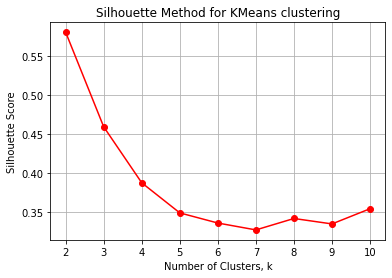

In [ ]:
plt.plot(cluster_range, silhouette_scores, marker='o', color='r', markersize=6)
plt.title('Silhouette Method for KMeans clustering')
plt.xticks(cluster_range)
plt.grid(True)
plt.xlabel("Number of Clusters, k")
plt.ylabel("Silhouette Score")
plt.show()

The value of **k** that yields the highest Silhouette Score is considered as the optimal **k**. So, **the optimal k is 2.** From the elbow method, we got 3 as the optimal k. 

Let's visualize silhouette score to get clear understanding about which is the best optimum number of clusters:



The average Silhouette Score for k =  2 is 0.580184463257396
The average Silhouette Score for k =  3 is 0.4589717867018717
The average Silhouette Score for k =  4 is 0.38724679456128813
The average Silhouette Score for k =  5 is 0.3486998366107098
The average Silhouette Score for k =  6 is 0.3357068375986225


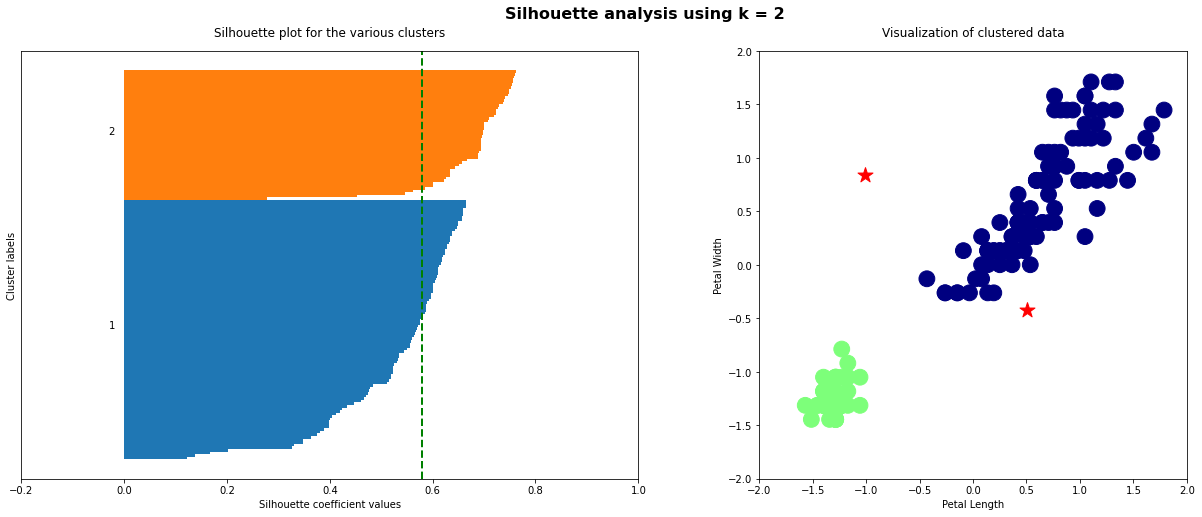

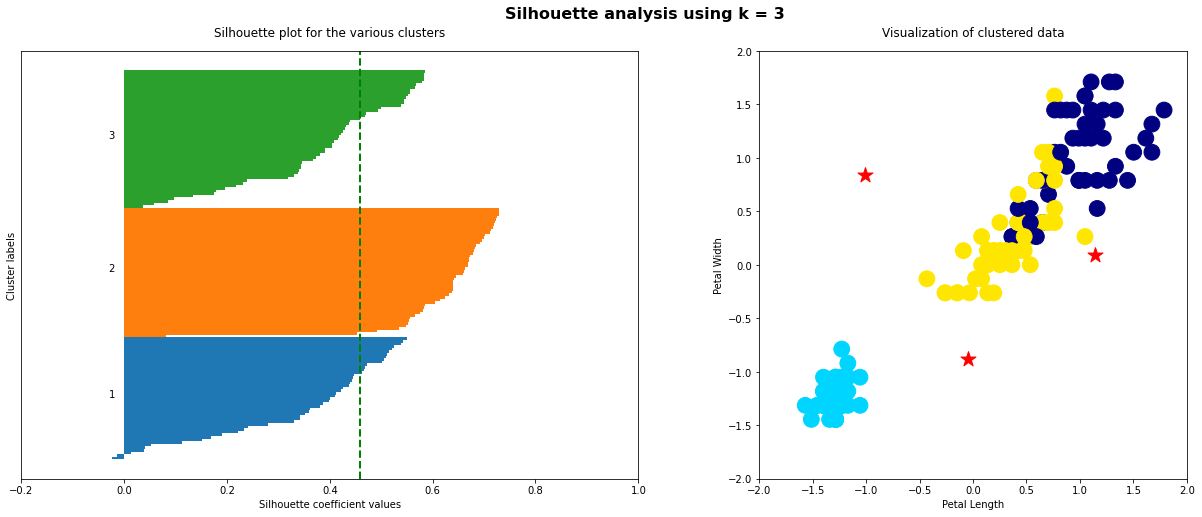

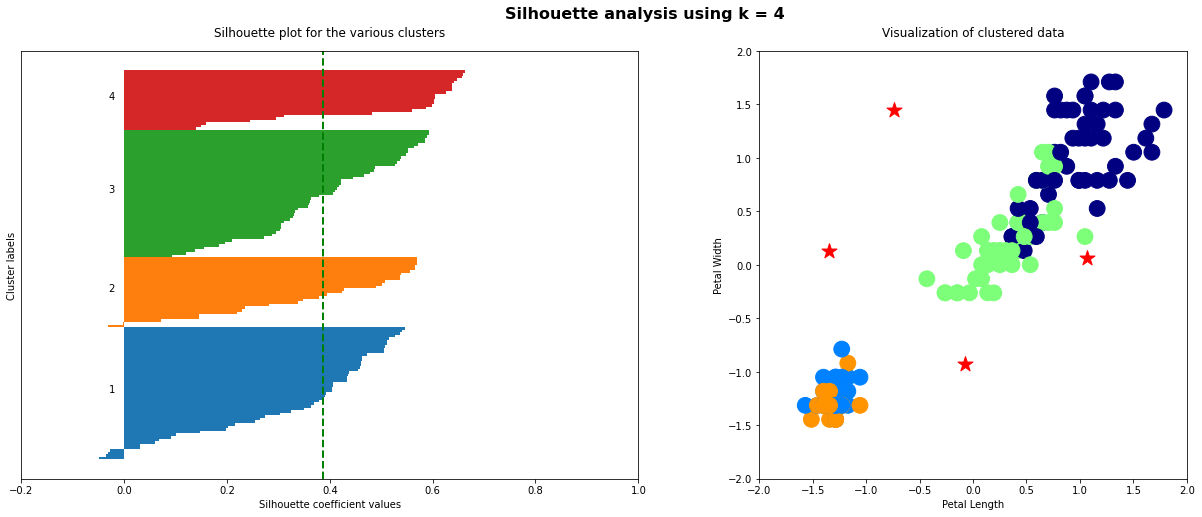

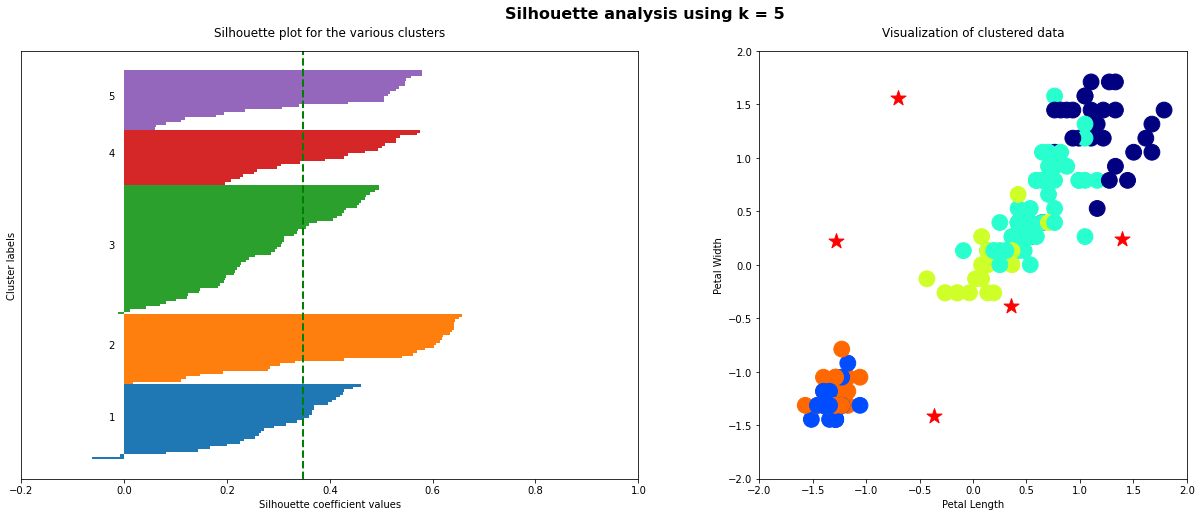

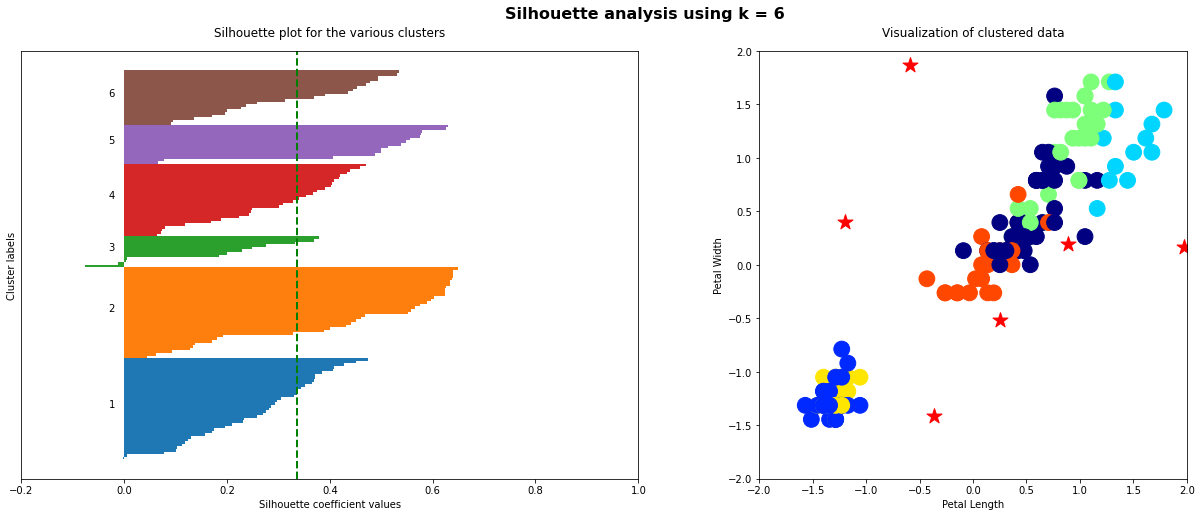

In [ ]:
import matplotlib.cm as cm # importing colormap 'cm' from matplotlib
for i, k in enumerate([2,3,4,5,6]): # printing enumerate values 2,3,4,5,6 along with index 0,1,2,3,4
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,7)

  # Running KMeans algorithm
  # Initialize the clusterer with n_clusters value and a random generator with seed of 10 for reproducibility.
  km = KMeans(n_clusters=k, random_state=10)
  km.fit(x)
  labels = km.fit_predict(x)
  centroids = km.cluster_centers_

  # Getting Silhouette samples
  silhouette_values = silhouette_samples(x, labels)

  # Silhouette plot
  y_lower, y_upper = 0,0
  for i, cluster in enumerate(np.unique(labels)): # cluster returns an array of unique labels in the input array
     # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
     cluster_silhouette_values = silhouette_values[labels == cluster]
     cluster_silhouette_values.sort()
     
     y_upper = y_upper + len(cluster_silhouette_values)
     ax1.barh(range(y_lower, y_upper), cluster_silhouette_values, edgecolor='none', height=1)
     # Label the silhouette plots with their cluster numbers at the middle
     ax1.text(-0.03, (y_lower + y_upper)/2, str(i+1))
     y_lower = y_lower + len(cluster_silhouette_values)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters
  Silhouette_avg_score = silhouette_score(x, labels)
  print("The average Silhouette Score for k = ", k, "is", Silhouette_avg_score)

  # After getting the average Silhouette score and plotting it
  ## The vertical line for average silhouette score of all the values
  ax1.axvline(Silhouette_avg_score, linestyle='--', linewidth=2, color='green')
  # clear the yaxis labels/ticks
  ax1.set_yticks([])
  ax1.set_xlim([-0.2,1])
  ax1.set_xlabel('Silhouette coefficient values')
  ax1.set_ylabel('Cluster labels')
  ax1.set_title('Silhouette plot for the various clusters', y=1.02) # setting y=1.02 to have a space between each plots

  # Scatterring plot of data colored with labels for first two columns of sepal length & width 
  ## 2nd plot showing the actual clusters formed
  ax2.scatter(x[:,2], x[:,3], s=250, c=cm.jet(labels.astype(float)/k)) 
  # highlighting cluster centroids
  ax2.scatter(centroids[:,0], centroids[:,1], marker='*', c='r', s=250)
  ax2.set_xlim([-2, 2])
  ax2.set_ylim([-2, 2])
  ax2.set_title('Visualization of clustered data', y=1.02)
  ax2.set_xlabel('Petal Length')
  ax2.set_ylabel('Petal Width')
  ax2.set_aspect('equal')
  plt.tight_layout()
  plt.suptitle(f'Silhouette analysis using k = {k}', fontsize=16, fontweight='semibold', y=1.02)  

From the above visualization of Silhouette plots, we can see that there is no outliers in two clusters (k=2) which has the best average silhouette score. **The bottom line (Green line) which is above 0.5 silhouette average score has a good optimum number of clusters (n_clusters).** 

Thus, finally we are concluding that ***k=2 is the optimum number of clusters***.

## **Training the K-means algorithm on the input dataset**

In [ ]:
# Running KMeans to the dataset -- k=2
kmeans_2 = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 10)
y_kmeans_2 = kmeans_2.fit_predict(x)
centroids_2 = kmeans_2.cluster_centers_
y_labels_2 = kmeans_2.labels_
y_labels_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## **Visualizing the clusters**

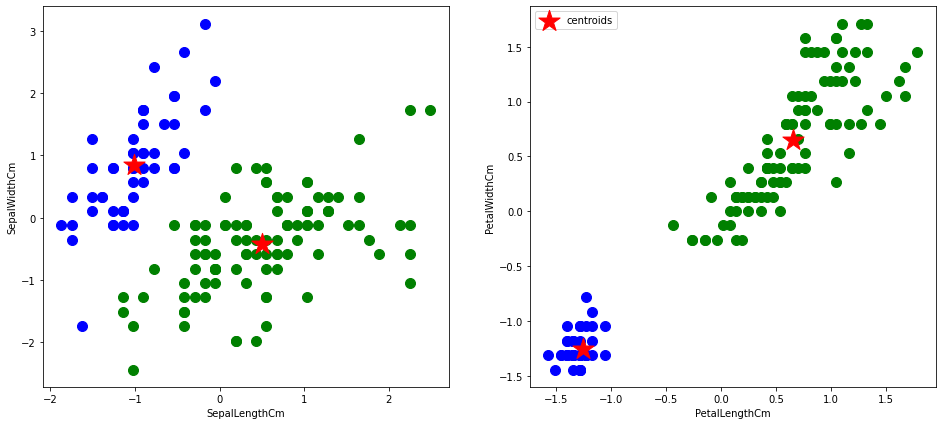

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,7)
# Visualizing the clusters - On the first two columns (SepalLengthCm & SepalWidthCm)
ax1.scatter(x[y_kmeans_2 == 0, 0], x[y_kmeans_2 == 0, 1], 
            s = 100, c = 'green')
ax1.scatter(x[y_kmeans_2 == 1, 0], x[y_kmeans_2 == 1, 1], 
            s = 100, c = 'blue')
ax1.set_xlabel('SepalLengthCm')
ax1.set_ylabel('SepalWidthCm')
# Visualizing the clusters - On the first two columns (PetalLengthCm & PetalWidthCm)
ax2.scatter(x[y_kmeans_2 == 0, 2], x[y_kmeans_2 == 0, 3], 
            s = 100, c = 'green')
ax2.scatter(x[y_kmeans_2 == 1, 2], x[y_kmeans_2 == 1, 3], 
            s = 100, c = 'blue')
ax2.set_xlabel('PetalLengthCm')
ax2.set_ylabel('PetalWidthCm')

# Plotting the centroids of the clusters
ax1.scatter(centroids_2[0, 0], centroids_2[0, 1], 
            s = 500, marker='*', c = 'red')
ax1.scatter(centroids_2[1, 0],centroids_2[1, 1], 
            s = 500, marker='*', c = 'red')
ax2.scatter(centroids_2[0, 2], centroids_2[0, 2], 
            s = 500, marker='*', c = 'red')
ax2.scatter(centroids_2[1, 3], centroids_2[1, 3], 
            s = 500, marker='*', c = 'red', label = 'centroids')

plt.legend()
plt.show()

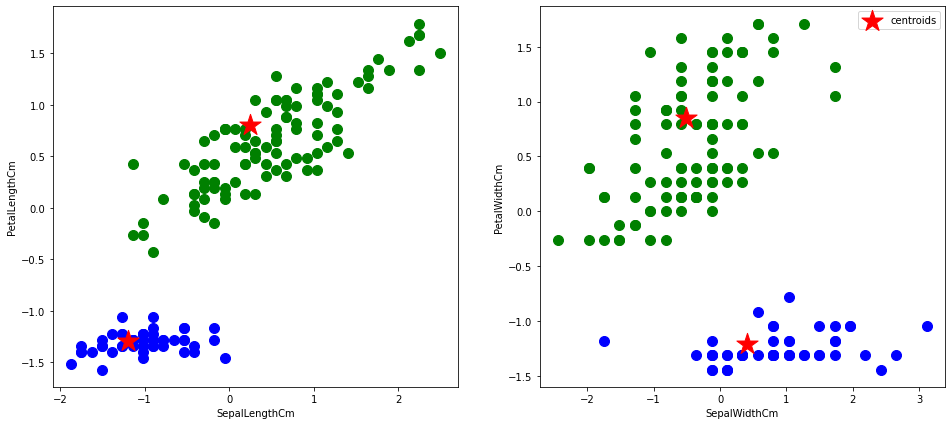

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,7)
# Visualizing the clusters - On the first two columns (SepalLengthCm & PetalLengthCm)
ax1.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], 
            s = 100, c = 'green')
ax1.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], 
            s = 100, c = 'blue')
ax1.set_xlabel('SepalLengthCm')
ax1.set_ylabel('PetalLengthCm')
# Visualizing the clusters - On the first two columns (SepalWidthCm & PetalWidthCm)
ax2.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 3], 
            s = 100, c = 'green')
ax2.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 3], 
            s = 100, c = 'blue')
ax2.set_xlabel('SepalWidthCm')
ax2.set_ylabel('PetalWidthCm')

# Plotting the centroids of the clusters
ax1.scatter(centroids[0, 0], kmeans.cluster_centers_[0, 2], 
            s = 500, marker='*', c = 'red')
ax1.scatter(centroids[1, 0], kmeans.cluster_centers_[1, 2], 
            s = 500, marker='*', c = 'red')
ax2.scatter(centroids[0, 1], kmeans.cluster_centers_[0, 3], 
            s = 500, marker='*', c = 'red')
ax2.scatter(centroids[1, 1], kmeans.cluster_centers_[1, 3], 
            s = 500, marker='*', c = 'red', label = 'centroids')

plt.legend()
plt.show()

In [ ]:
pd.crosstab(y, y_labels_2)

col_0,0,1
Species,,
Iris-setosa,0,50
Iris-versicolor,50,0
Iris-virginica,50,0


This shows that three Species **('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')** were ***perfectly grouped***. Hence, our prediction with optimum number of two clusters, k=2 gives a perfect result.

We can also see how well the other clusters are prediciting on real data. For instance, we use k=3:

In [ ]:
# Running KMeans to the dataset -- k=3
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 10)
y_kmeans_3 = kmeans_3.fit_predict(x)
centroids_3 = kmeans_3.cluster_centers_
y_labels_3 = kmeans_3.labels_

In [ ]:
pd.crosstab(y, y_labels_3)

col_0,0,1,2
Species,,,
Iris-setosa,0,50,0
Iris-versicolor,11,0,39
Iris-virginica,36,0,14


Here, it shows that only Iris-setosa was perfectly grouped. However, Iris-versicolor and Iris-virginica both have a number of inconsistent groupings. This is most due to outliers.

###**Therefore, best optimum number of clusters is 2 to predict new data.**

Hence, concludes the K-Means Clustering.